In [908]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [909]:
corpus = "2020" 
judges = "factors_"
v2 = False
factor = -5


In [910]:
scores = pd.read_csv(f"controversy_results/controversy_scores_{judges}{corpus}.csv")

if v2:
    scores.loc[:, "topic"] = scores["topic"].astype("str")
    scores = scores[(scores["topic"].str.endswith("4")) | (scores["topic"].str.endswith("5")) | (scores["topic"].str.endswith("6"))]
    scores.reset_index(drop=True, inplace=True)
    corpus = "clef_v2"

scores

,topic,score1,score2,score3,score4,score5
0,1,"[3, 4, 4, 4, 4]","[3, 4, 4, 4, 4]","[2, 4, 3, 3, 3]","[2, 4, 3, 4, 4]","[2, 4, 4, 3, 4]"
1,2,"[3, 4, 4, 3, 4]","[3, 4, 4, 4, 4]","[2, 4, 3, 3, 3]","[3, 4, 3, 4, 4]","[3, 4, 4, 4, 4]"
2,3,"[3, 4, 4, 4, 4]","[3, 4, 4, 4, 4]","[3, 4, 3, 3, 4]","[3, 4, 4, 3, 4]","[3, 4, 3, 3, 4]"
3,4,"[3, 4, 4, 4, 4]","[3, 4, 4, 4, 4]","[2, 4, 3, 3, 3]","[2, 4, 3, 3, 4]","[3, 4, 4, 4, 4]"
4,5,"[3, 4, 4, 4, 4]","[3, 4, 4, 4, 4]","[3, 4, 4, 4, 4]","[2, 4, 3, 4, 4]","[3, 4, 4, 3, 4]"
5,6,"[3, 4, 4, 4, 4]","[3, 4, 4, 4, 4]","[3, 4, 4, 4, 4]","[3, 4, 4, 4, 4]","[3, 4, 3, 4, 4]"
6,7,"[2, 5, 5, 5, 5]","[3, 5, 5, 5, 5]","[3, 5, 4, 4, 4]","[2, 5, 5, 5, 4]","[2, 5, 4, 4, 4]"
7,8,"[3, 4, 4, 4, 4]","[2, 4, 3, 3, 3]","[3, 4, 3, 4, 4]","[3, 4, 4, 4, 4]","[2, 4, 3, 4, 4]"
8,9,"[2, 4, 3, 3, 3]","[2, 4, 3, 3, 3]","[2, 4, 3, 3, 3]","[3, 4, 4, 4, 4]","[2, 4, 4, 3, 4]"
9,10,"[2, 3, 3, 3, 3]","[2, 3, 3, 3, 3]","[2, 3, 2, 3, 3]","[2, 4, 3, 4, 4]","[2, 3, 3, 3, 3]"


In [911]:
for col in scores.columns:
        if col != 'topic':
            scores[col] = scores[col].apply(lambda x: ast.literal_eval(x)[factor])

scores

,topic,score1,score2,score3,score4,score5
0,1,3,3,2,2,2
1,2,3,3,2,3,3
2,3,3,3,3,3,3
3,4,3,3,2,2,3
4,5,3,3,3,2,3
5,6,3,3,3,3,3
6,7,2,3,3,2,2
7,8,3,2,3,3,2
8,9,2,2,2,3,2
9,10,2,2,2,2,2


In [912]:
scores.describe()

,topic,score1,score2,score3,score4,score5
count,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,25.50000,2.560000,2.560000,2.560000,2.620000,2.520000
std,14.57738,0.540597,0.577115,0.577115,0.567486,0.646498
min,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,13.25000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,25.50000,3.000000,3.000000,3.000000,3.000000,2.000000
75%,37.75000,3.000000,3.000000,3.000000,3.000000,3.000000
max,50.00000,3.000000,3.000000,4.000000,3.000000,4.000000


In [913]:
# Compute the standard deviation for each row (excluding 'topic' column)
row_std = scores.iloc[:, 1:].std(axis=1)

# Compute the average of these standard deviations
row_std.mean()

0.3559150475020062

In [914]:
if judges != "":
    scores["score"] = scores[["score1", "score2", "score3", "score4", "score5"]].sum(axis=1)
    scores["score0-5"] = scores["score"] / 5

In [915]:
df = scores.sort_values(by="score", ascending=False)
df = df.reset_index(drop=True)
df

,topic,score1,score2,score3,score4,score5,score,score0-5
0,14,3,3,4,3,3,16,3.2
1,39,3,3,3,3,4,16,3.2
2,20,3,3,3,3,4,16,3.2
3,47,3,3,3,3,3,15,3.0
4,25,3,3,3,3,3,15,3.0
5,19,3,3,3,3,3,15,3.0
6,36,3,3,3,3,3,15,3.0
7,35,3,3,3,3,3,15,3.0
8,3,3,3,3,3,3,15,3.0
9,6,3,3,3,3,3,15,3.0


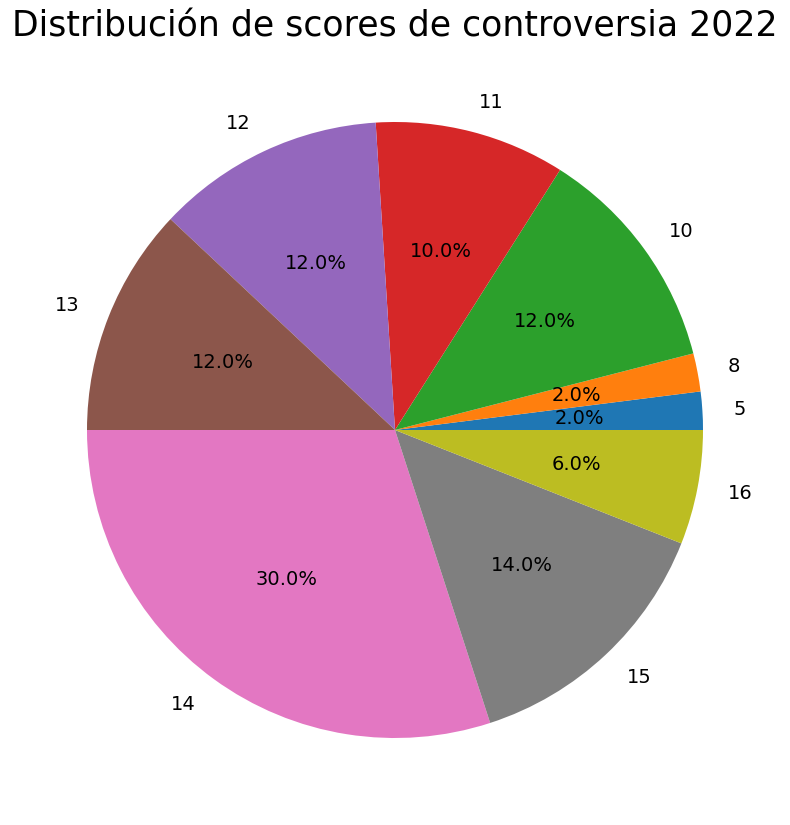

In [916]:
# Group by score and count the number of topics in each score group
df_grouped = df.groupby('score').count()
df_grouped = df_grouped.reset_index()
df_grouped = df_grouped.rename(columns={"topic": "count"})

# Do a pie chart
plt.figure(figsize=(10, 10))
plt.pie(df_grouped['count'], labels=df_grouped['score'], autopct='%1.1f%%', textprops={'fontsize': 14})
plt.title('Distribución de scores de controversia 2022', fontsize=25)
plt.show()

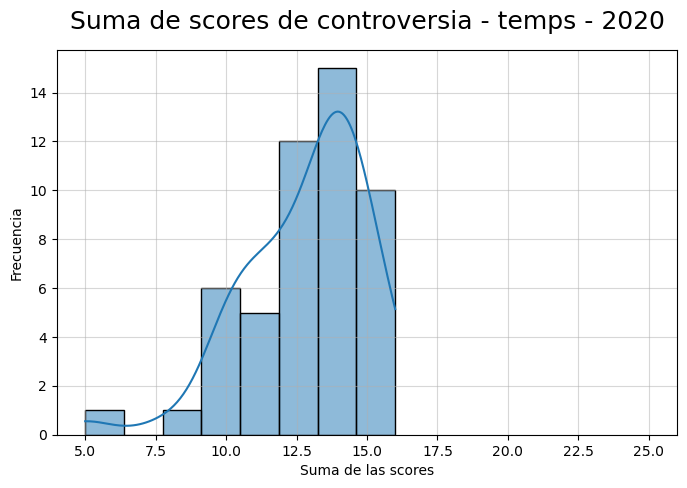

In [917]:
plt.figure(figsize=(8, 5))
sns.histplot(df['score'], kde=True)
plt.xlabel(f"Suma de las scores")
plt.xlim(4, 26)
plt.ylabel("Frecuencia")
plt.title(f"Suma de scores de controversia - temps - {corpus}", fontsize=18, pad=15)
plt.grid(True, alpha=0.5)

plt.show()

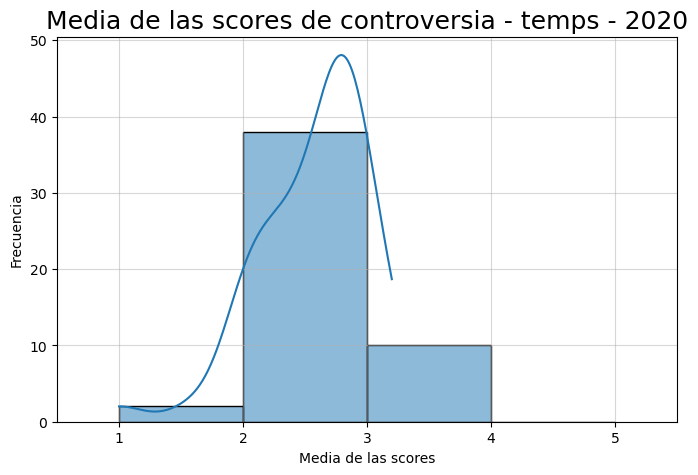

In [918]:
plt.figure(figsize=(8, 5))
bin_edges = [1, 2, 3, 4, 5]
sns.histplot(df['score0-5'], kde=True, bins=bin_edges)
plt.xlabel(f"Media de las scores")
plt.ylabel("Frecuencia")
plt.xlim(0.5, 5.5)
plt.title(f"Media de las scores de controversia - temps - {corpus}", fontsize=18)
plt.grid(True, alpha=0.5)

plt.show()

In [919]:
ndcg_harm_2020 = pd.read_csv(f'ndcg_harmful_only_results/ndcg_harmful_only_output_minilm_2020.csv')
ndcg_harm_2021 = pd.read_csv(f'ndcg_harmful_only_results/ndcg_harmful_only_output_minilm_2021.csv')
ndcg_harm_2022 = pd.read_csv(f'ndcg_harmful_only_results/ndcg_harmful_only_output_minilm_2022.csv')
ndcg_harm_clef_v2 = pd.read_csv(f'ndcg_harmful_only_results/ndcg_harmful_only_output_minilm_CLEF.csv')


ndcg_harms = {"2020": ndcg_harm_2020, "2021": ndcg_harm_2021, "2022": ndcg_harm_2022, "clef_v2": ndcg_harm_clef_v2}

In [920]:
ndcg_harms[corpus]

,run,topic,ndcg_cut_5,ndcg_cut_10,ndcg_cut_15,ndcg_cut_20,ndcg_cut_30,ndcg_cut_100,ndcg_cut_200,ndcg_cut_500,ndcg_cut_1000
0,minilm_2020,1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0173,0.0458,0.0724
1,minilm_2020,10,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,minilm_2020,13,0.0000,0.0000,0.0000,0.0323,0.0940,0.0864,0.0920,0.2034,0.2874
3,minilm_2020,14,0.0000,0.0499,0.1095,0.0954,0.1543,0.2492,0.2970,0.3597,0.4049
4,minilm_2020,15,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0460,0.0460
5,minilm_2020,16,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
6,minilm_2020,17,0.3392,0.2201,0.1706,0.2078,0.1827,0.1875,0.2444,0.3417,0.3847
7,minilm_2020,18,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
8,minilm_2020,19,0.2140,0.2122,0.2093,0.2754,0.2575,0.3011,0.3846,0.4132,0.4195
9,minilm_2020,2,0.1696,0.1100,0.0913,0.1012,0.1240,0.2528,0.3180,0.3632,0.3953


In [921]:
ndcg_harms[corpus][f"score0-5"] = df[f"score0-5"]
ndcg_harms[corpus]

,run,topic,ndcg_cut_5,ndcg_cut_10,ndcg_cut_15,ndcg_cut_20,ndcg_cut_30,ndcg_cut_100,ndcg_cut_200,ndcg_cut_500,ndcg_cut_1000,score0-5
0,minilm_2020,1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0173,0.0458,0.0724,3.2
1,minilm_2020,10,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,3.2
2,minilm_2020,13,0.0000,0.0000,0.0000,0.0323,0.0940,0.0864,0.0920,0.2034,0.2874,3.2
3,minilm_2020,14,0.0000,0.0499,0.1095,0.0954,0.1543,0.2492,0.2970,0.3597,0.4049,3.0
4,minilm_2020,15,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0460,0.0460,3.0
5,minilm_2020,16,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,3.0
6,minilm_2020,17,0.3392,0.2201,0.1706,0.2078,0.1827,0.1875,0.2444,0.3417,0.3847,3.0
7,minilm_2020,18,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,3.0
8,minilm_2020,19,0.2140,0.2122,0.2093,0.2754,0.2575,0.3011,0.3846,0.4132,0.4195,3.0
9,minilm_2020,2,0.1696,0.1100,0.0913,0.1012,0.1240,0.2528,0.3180,0.3632,0.3953,3.0


In [922]:
ndcg_harms[corpus] = ndcg_harms[corpus].drop(["run", "topic"], axis=1)

In [923]:
ndcg_harms[corpus].corr(method="pearson").round(3)

,ndcg_cut_5,ndcg_cut_10,ndcg_cut_15,ndcg_cut_20,ndcg_cut_30,ndcg_cut_100,ndcg_cut_200,ndcg_cut_500,ndcg_cut_1000,score0-5
ndcg_cut_5,1.000,0.853,0.821,0.840,0.802,0.743,0.635,0.659,0.620,-0.009
ndcg_cut_10,0.853,1.000,0.959,0.948,0.873,0.783,0.671,0.675,0.643,-0.016
ndcg_cut_15,0.821,0.959,1.000,0.987,0.954,0.881,0.809,0.788,0.740,-0.026
ndcg_cut_20,0.840,0.948,0.987,1.000,0.968,0.883,0.818,0.799,0.752,0.024
ndcg_cut_30,0.802,0.873,0.954,0.968,1.000,0.953,0.898,0.869,0.816,0.036
ndcg_cut_100,0.743,0.783,0.881,0.883,0.953,1.000,0.959,0.923,0.869,-0.003
ndcg_cut_200,0.635,0.671,0.809,0.818,0.898,0.959,1.000,0.958,0.914,-0.062
ndcg_cut_500,0.659,0.675,0.788,0.799,0.869,0.923,0.958,1.000,0.981,-0.101
ndcg_cut_1000,0.620,0.643,0.740,0.752,0.816,0.869,0.914,0.981,1.000,-0.100
score0-5,-0.009,-0.016,-0.026,0.024,0.036,-0.003,-0.062,-0.101,-0.100,1.000


In [924]:
ndcg_harms[corpus].corr(method="kendall").round(3)

,ndcg_cut_5,ndcg_cut_10,ndcg_cut_15,ndcg_cut_20,ndcg_cut_30,ndcg_cut_100,ndcg_cut_200,ndcg_cut_500,ndcg_cut_1000,score0-5
ndcg_cut_5,1.000,0.825,0.757,0.742,0.683,0.653,0.572,0.571,0.533,-0.039
ndcg_cut_10,0.825,1.000,0.919,0.901,0.817,0.743,0.660,0.617,0.579,-0.052
ndcg_cut_15,0.757,0.919,1.000,0.940,0.884,0.775,0.700,0.652,0.623,-0.039
ndcg_cut_20,0.742,0.901,0.940,1.000,0.895,0.788,0.708,0.670,0.633,0.018
ndcg_cut_30,0.683,0.817,0.884,0.895,1.000,0.866,0.771,0.708,0.672,0.000
ndcg_cut_100,0.653,0.743,0.775,0.788,0.866,1.000,0.868,0.760,0.709,-0.081
ndcg_cut_200,0.572,0.660,0.700,0.708,0.771,0.868,1.000,0.837,0.783,-0.123
ndcg_cut_500,0.571,0.617,0.652,0.670,0.708,0.760,0.837,1.000,0.904,-0.088
ndcg_cut_1000,0.533,0.579,0.623,0.633,0.672,0.709,0.783,0.904,1.000,-0.063
score0-5,-0.039,-0.052,-0.039,0.018,0.000,-0.081,-0.123,-0.088,-0.063,1.000


In [925]:
ndcg_harms[corpus].corr(method="spearman").round(3)

,ndcg_cut_5,ndcg_cut_10,ndcg_cut_15,ndcg_cut_20,ndcg_cut_30,ndcg_cut_100,ndcg_cut_200,ndcg_cut_500,ndcg_cut_1000,score0-5
ndcg_cut_5,1.000,0.893,0.828,0.834,0.772,0.753,0.703,0.693,0.648,-0.048
ndcg_cut_10,0.893,1.000,0.978,0.967,0.910,0.875,0.829,0.793,0.746,-0.063
ndcg_cut_15,0.828,0.978,1.000,0.980,0.941,0.899,0.863,0.825,0.782,-0.049
ndcg_cut_20,0.834,0.967,0.980,1.000,0.960,0.904,0.859,0.836,0.796,0.019
ndcg_cut_30,0.772,0.910,0.941,0.960,1.000,0.963,0.917,0.868,0.830,0.007
ndcg_cut_100,0.753,0.875,0.899,0.904,0.963,1.000,0.950,0.886,0.851,-0.102
ndcg_cut_200,0.703,0.829,0.863,0.859,0.917,0.950,1.000,0.951,0.927,-0.168
ndcg_cut_500,0.693,0.793,0.825,0.836,0.868,0.886,0.951,1.000,0.981,-0.125
ndcg_cut_1000,0.648,0.746,0.782,0.796,0.830,0.851,0.927,0.981,1.000,-0.094
score0-5,-0.048,-0.063,-0.049,0.019,0.007,-0.102,-0.168,-0.125,-0.094,1.000
